## Introduction
This notebook is used to illustrate:

1. Not every dollar invested in a share of stock is equal in terms of risk and return.
2. Investors can use the tool of options to control the risk and return of their investment.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load data for illustration: prices (as of market close on 2023-11-24) of the options of SPY ETF that expire on 2014-01-19.

In [9]:
# load the illustrative data
df_opt = pd.read_csv('spy_20231124_20240119.csv')

# select columns
df_opt = df_opt[['Strike', 'Call Price', 'Put Price']]

# set index to Strike
df_opt = df_opt.set_index('Strike')


Define the function that calculates the return of owning a call option when stock (SPY) price hits different possible prices at the option expiration.

In [48]:
# price range
p = np.linspace(250, 550, 301)

def call_option_return(price, strike):
    return np.maximum(price - strike, 0) - float(df_opt.loc[strike, 'Call Price'])

Assume the investor has $5000. Different investing strategies exist for different risk/reward.

Strategy 1: Buy one call option with strike price = 48

Investment amount: 49.86


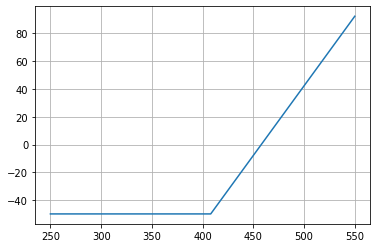

In [72]:
strike = 408
plt.plot(p,call_option_return(p, strike))
plt.grid(True)
print(f'Investment amount: {df_opt.loc[strike, "Call Price"]}')

Strategy 2: 

Investment amount: 50.14


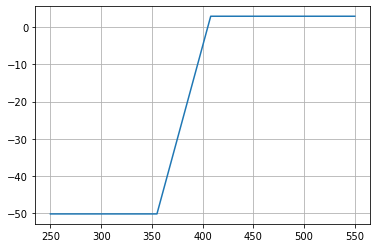

In [75]:
strike1 = 408
strike2 = 355
plt.plot(p,call_option_return(p, strike2) - call_option_return(p, strike1))
plt.grid(True)
print(f'Investment amount: {float(df_opt.loc[strike2, "Call Price"]) - float(df_opt.loc[strike1, "Call Price"])}')

Investment amount: 50.19999999999999


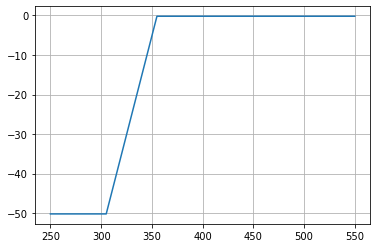

In [76]:
strike1 = 355
strike2 = 305
plt.plot(p,call_option_return(p, strike2) - call_option_return(p, strike1))
plt.grid(True)
print(f'Investment amount: {float(df_opt.loc[strike2, "Call Price"]) - float(df_opt.loc[strike1, "Call Price"])}')